In [35]:
import numpy as np
%load_ext autoreload
%autoreload 1
import os
from datetime import timedelta

import obspy
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from obspy import UTCDateTime

from insight.util import TraceFile, snr

pd.set_option("display.max_rows", 15)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load Data

In [4]:
DATA_DIR = "../data/"
CAT_FILE = "a_quality.parquet"
network, station, location = "XB", "ELYSE", "02"
# 
events = pd.read_parquet(os.path.join(DATA_DIR, CAT_FILE))
st = {}
for event in events.index:
    trace_file = TraceFile(network, station, location, events.loc[event].id)
    st[event] = obspy.read(os.path.join(DATA_DIR, "zne", str(trace_file)))
events

,id,region name,time,quality,mqs_azimuth,mqs_distance,M_w,arrival,phase
earthquake name,,,,,,,,,
S1222a,mqs2022isne,Aeolis Northeast,2022-05-04T23:23:07.710516Z,A,109.000000,37.014014,4.6,2022-05-04 23:27:45.690496+00:00,P
S0976a,mqs2021qpls,Coprates Northwest,2021-08-25T03:32:20.629953Z,A,101.000000,146.259259,4.3,2021-08-25 03:49:06.404728+00:00,PP
S1000a,mqs2021sijy,Lunae Palus Northwest,2021-09-18T17:46:20.639751Z,A,55.000000,128.291291,4.1,2021-09-18 18:01:47.477589+00:00,PP
S1094b,mqs2021zdzn,Diacria Southwest,2021-12-24T22:38:02.749173Z,A,40.000000,59.653654,4.0,2021-12-24 22:45:09.075499+00:00,P
S1133c,mqs2022cixp,Elysium Southeast,2022-02-03T08:04:36.469259Z,A,90.000000,30.006507,3.8,2022-02-03 08:08:25.717507+00:00,P
S0235b,mqs2019onhx,Elysium Southeast,2019-07-26T12:15:38.748239Z,A,258.030468,28.748749,3.7,2019-07-26 12:19:18.032523+00:00,P
S0173a,mqs2019jzqa,Elysium Southeast,2019-05-23T02:19:09.852879Z,A,91.000000,30.006507,3.7,2019-05-23 02:22:59.069095+00:00,P
S1048d,mqs2021vwbn,Elysium Southeast,2021-11-07T22:00:15.254098Z,A,100.000000,30.186186,3.6,2021-11-07 22:04:05.355199+00:00,P
S1022a,mqs2021tyvj,Elysium Northeast,2021-10-11T23:14:29.105382Z,A,63.000000,30.725225,3.6,2021-10-11 23:18:25.025302+00:00,P


## SNR Estimation

Use $\textrm{SNR} = 10\log_{10}\left(\frac{S_\textrm{rms}}{N_\textrm{rms}}\right)$ where N & S are the 10 seconds before and after estimated p-arrivals.

In [5]:
events["snr"] = events.apply(lambda e: snr(UTCDateTime(e.arrival), 10.0, st[e.name].select(component="Z")[0]), axis="columns")
events

,id,region name,time,quality,mqs_azimuth,mqs_distance,M_w,arrival,phase,snr
earthquake name,,,,,,,,,,
S1222a,mqs2022isne,Aeolis Northeast,2022-05-04T23:23:07.710516Z,A,109.000000,37.014014,4.6,2022-05-04 23:27:45.690496+00:00,P,4.884617
S0976a,mqs2021qpls,Coprates Northwest,2021-08-25T03:32:20.629953Z,A,101.000000,146.259259,4.3,2021-08-25 03:49:06.404728+00:00,PP,0.001971
S1000a,mqs2021sijy,Lunae Palus Northwest,2021-09-18T17:46:20.639751Z,A,55.000000,128.291291,4.1,2021-09-18 18:01:47.477589+00:00,PP,0.002638
S1094b,mqs2021zdzn,Diacria Southwest,2021-12-24T22:38:02.749173Z,A,40.000000,59.653654,4.0,2021-12-24 22:45:09.075499+00:00,P,0.007527
S1133c,mqs2022cixp,Elysium Southeast,2022-02-03T08:04:36.469259Z,A,90.000000,30.006507,3.8,2022-02-03 08:08:25.717507+00:00,P,-0.038998
S0235b,mqs2019onhx,Elysium Southeast,2019-07-26T12:15:38.748239Z,A,258.030468,28.748749,3.7,2019-07-26 12:19:18.032523+00:00,P,0.006093
S0173a,mqs2019jzqa,Elysium Southeast,2019-05-23T02:19:09.852879Z,A,91.000000,30.006507,3.7,2019-05-23 02:22:59.069095+00:00,P,0.005856
S1048d,mqs2021vwbn,Elysium Southeast,2021-11-07T22:00:15.254098Z,A,100.000000,30.186186,3.6,2021-11-07 22:04:05.355199+00:00,P,-0.014634
S1022a,mqs2021tyvj,Elysium Northeast,2021-10-11T23:14:29.105382Z,A,63.000000,30.725225,3.6,2021-10-11 23:18:25.025302+00:00,P,-0.011719


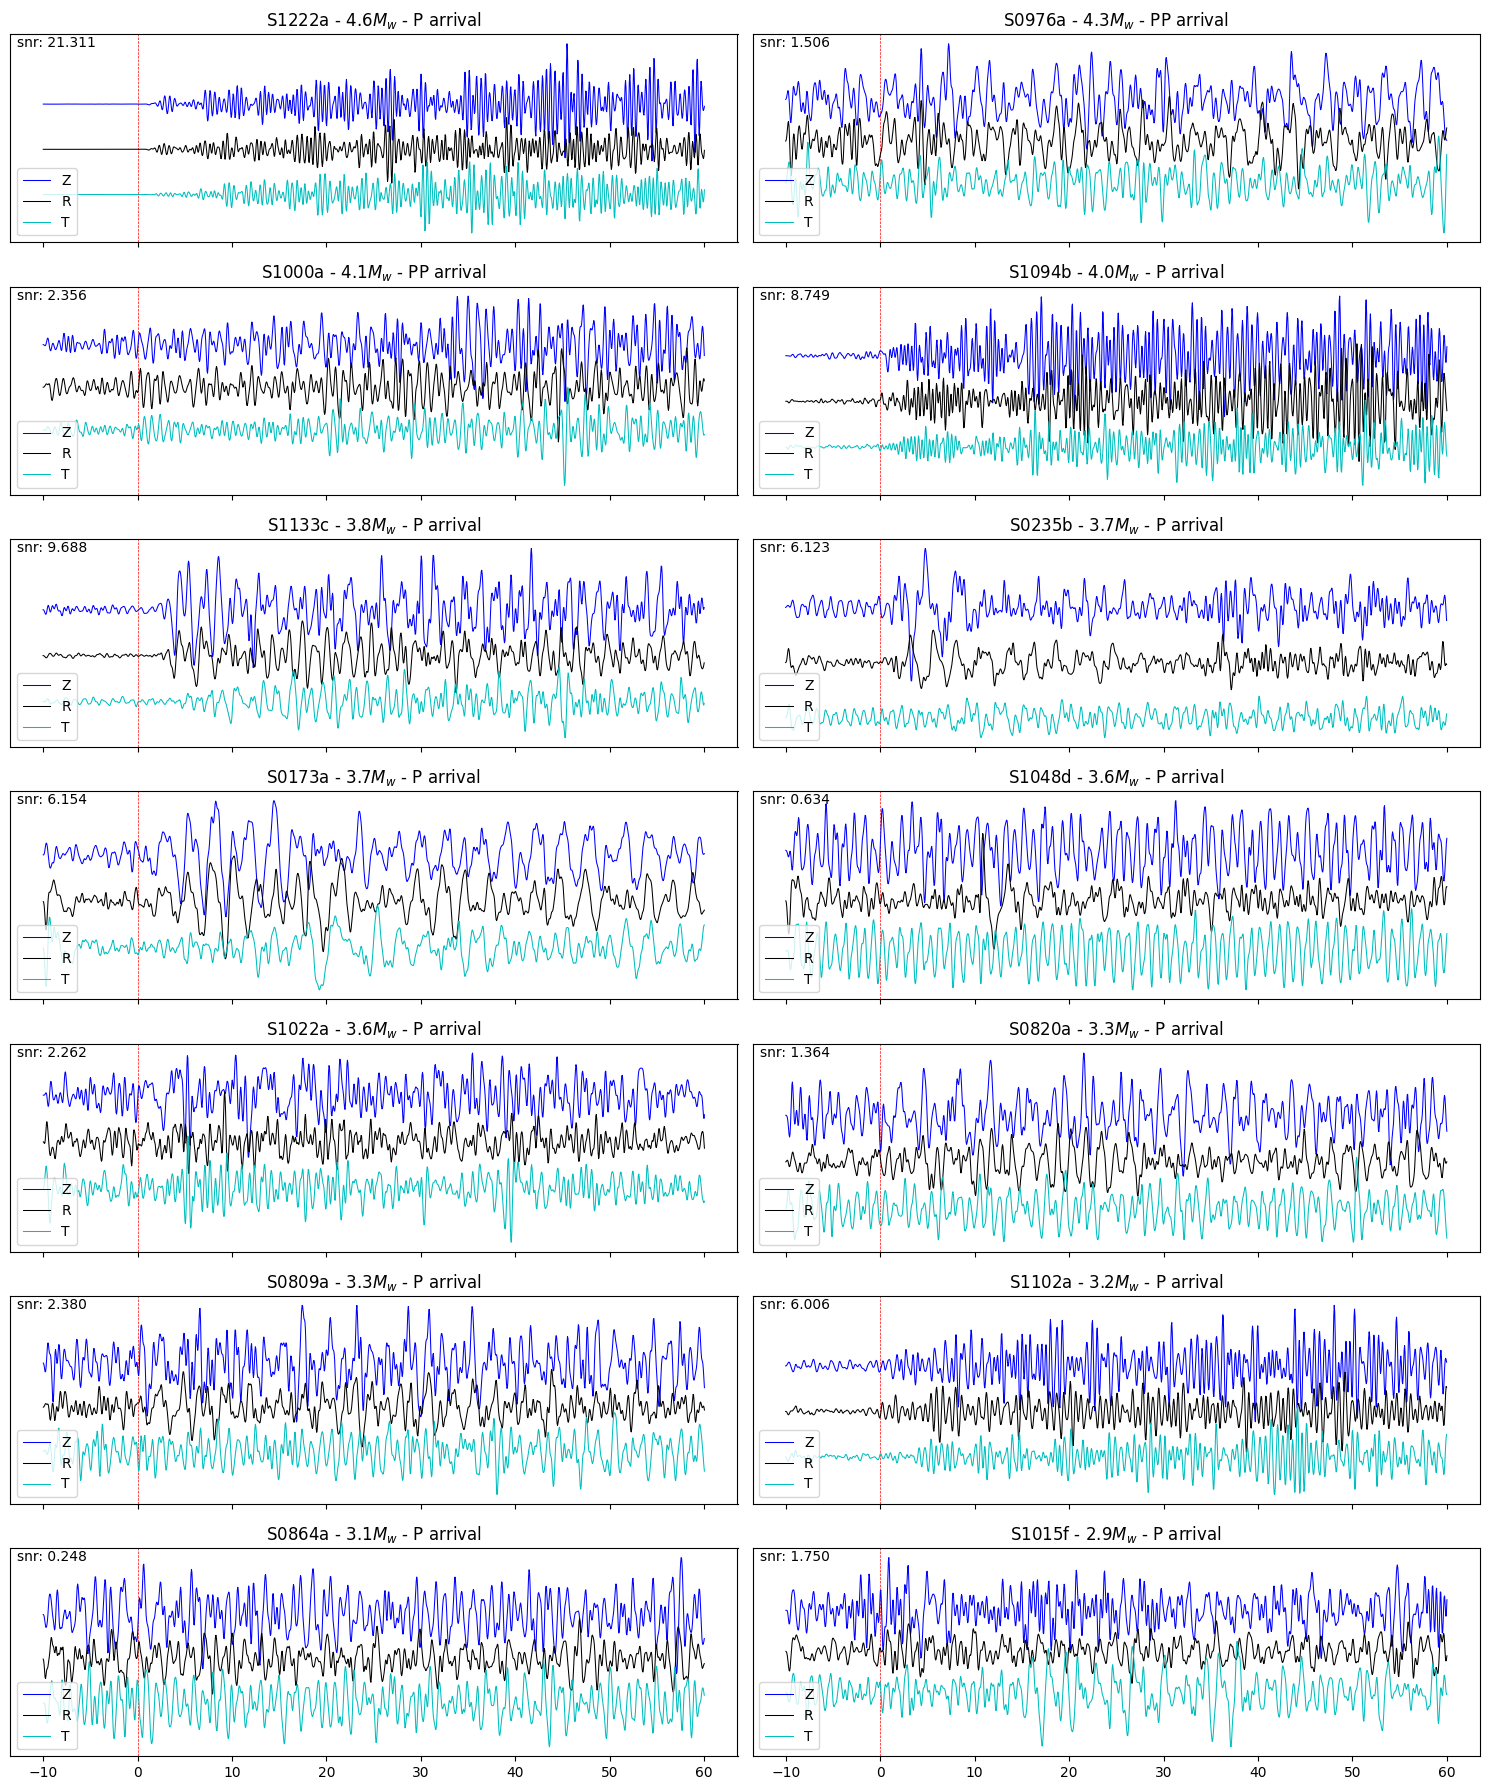

In [6]:
event_ids = events.index
fig, axs = plt.subplots(int(len(event_ids) / 2), 2, figsize=(15, 18), dpi=100, sharex="col")
fig.tight_layout()

channels = "ZRT"
colors = "bkc"

for i in range(len(event_ids)):
    x, y = int(i / 2), i % 2
    ax = axs[x, y]
    ax.set_yticks([])
    event = events.iloc[i]

    trace_file = TraceFile(network, station, location, event.id)
    st = obspy.read(os.path.join(DATA_DIR, "zne", str(trace_file)))
    st.rotate(method="NE->RT", back_azimuth=event.mqs_azimuth)
    st_sliced = st.slice(
        UTCDateTime(event.arrival - timedelta(seconds=10)),
        UTCDateTime(event.arrival + timedelta(seconds=60)),
    )
    
    st_sliced = st_sliced.detrend("linear")
    st_sliced = st_sliced.detrend("constant")
    st_sliced = st_sliced.filter("bandpass", freqmin=0.25, freqmax=2.0, corners=4)
    st_sliced.normalize(global_max=True)
    
    # snr
    snr_val = snr(UTCDateTime(event.arrival), 10.0, st_sliced.select(component="Z")[0])

    # Plot
    ax.set_title(f"{event.name} - {event.M_w}$M_w$ - {event.phase} arrival")
    ax.axvline(0, color="r", linestyle="--", linewidth=0.5)
    for j in range(len(channels)):
        tr = st_sliced.select(component=channels[j])[0]
        ax.plot(tr.times(reftime=UTCDateTime(event.arrival)), tr.data - j * 0.75, color=colors[j], linewidth=0.75,
                label=channels[j])
        # ax.plot(tr.times("matplotlib"), tr.data - j * 0.75, color=colors[j], linewidth=0.75, label=channels[j])
    ax.text(.01, .99, f"snr: {snr_val:0.3f}", ha='left', va='top', transform=ax.transAxes)
    ax.legend(loc="lower left")
fig.tight_layout()